In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data #this library we are importing bcoz we want to import data from yahoo finance website
from pandas_datareader import data as pdr
import datetime



In [8]:
start='2010-01-01' #from this date we are taking data for our website
end = '2022-10-31'
#date = datetime.date.today().strftime("%Y-%m-%d") #upto this date data will taken
# more the data frame is the more good prediction will be
 
# defining dataframe: df
#here we are taking only one comapnay data but when we will make web app than we will make dynamic dataframe so user can choose acc company acc to thier wish

df=data.DataReader('GRINDWELL.NS','yahoo',start,date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,81.500000,73.550003,75.099998,78.474998,634902.0,62.053917
2010-01-05,79.500000,76.775002,79.474998,77.375000,75240.0,61.184074
2010-01-06,80.000000,76.550003,76.550003,78.175003,83870.0,61.816689
2010-01-07,81.300003,78.050003,79.000000,78.400002,168084.0,61.994591
2010-01-08,80.000000,77.599998,79.500000,78.349998,80266.0,61.955070


In [9]:
 df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-04,2128.050049,2071.050049,2114.350098,2112.550049,60724.0,2112.550049
2022-11-07,2172.000000,2106.000000,2123.149902,2128.149902,106397.0,2128.149902
2022-11-09,2159.949951,2091.000000,2129.199951,2116.699951,31829.0,2116.699951
2022-11-10,2140.000000,2061.350098,2115.000000,2134.050049,122499.0,2134.050049
2022-11-11,2189.949951,2119.600098,2160.000000,2150.000000,155257.0,2150.000000


In [17]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,81.500000,73.550003,75.099998,78.474998,634902.0,62.053913
1,2010-01-05,79.500000,76.775002,79.474998,77.375000,75240.0,61.184090
2,2010-01-06,80.000000,76.550003,76.550003,78.175003,83870.0,61.816692
3,2010-01-07,81.300003,78.050003,79.000000,78.400002,168084.0,61.994610
4,2010-01-08,80.000000,77.599998,79.500000,78.349998,80266.0,61.955051


In [18]:
df= df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,81.500000,73.550003,75.099998,78.474998,634902.0
1,79.500000,76.775002,79.474998,77.375000,75240.0
2,80.000000,76.550003,76.550003,78.175003,83870.0
3,81.300003,78.050003,79.000000,78.400002,168084.0
4,80.000000,77.599998,79.500000,78.349998,80266.0


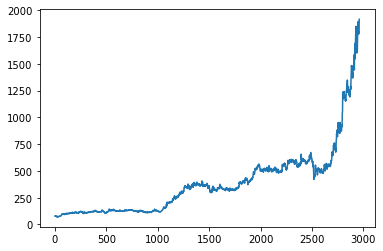

In [19]:
plt.plot(df.Close)

In [20]:
#plt.plot(df.Open)

In [21]:
#creating moving averages(MA)
#for MA we have to call a function rolling
ma100=df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2956    1526.049995
2957    1532.240995
2958    1538.387996
2959    1544.864995
2960    1551.487996
Name: Close, Length: 2961, dtype: float64

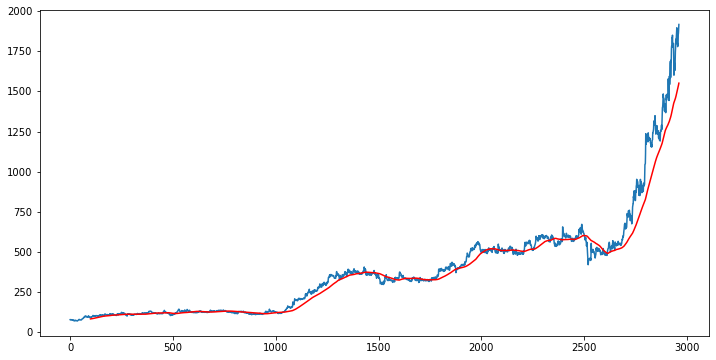

In [22]:
#ploting ma100 on closing graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [23]:
# creating ma200
ma200=df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2956    1313.786747
2957    1318.534997
2958    1323.148997
2959    1327.908997
2960    1332.823747
Name: Close, Length: 2961, dtype: float64

Text(0, 0.5, 'y_train')

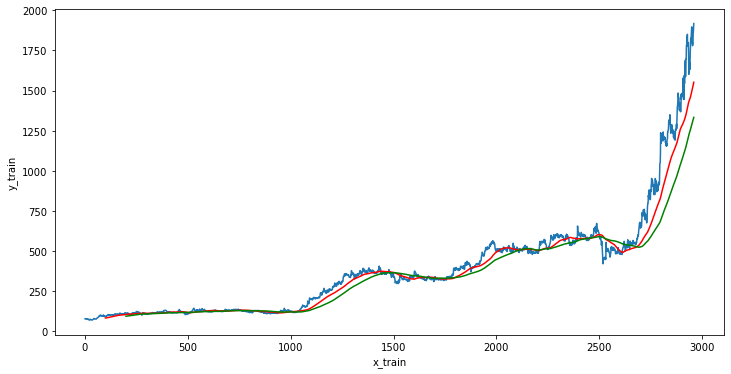

In [24]:
#ploting ma200 on closing graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [36]:
df.shape

(3022, 5)

In [37]:
#slipting data into trainning and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [38]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [39]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [40]:
#scalling of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
data_training_array = scaler.fit_transform(data_training)
data_training_array
data_training_array.shape

(2115, 1)

In [21]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train,y_train=np.array(x_train), np.array(y_train)


In [44]:
x_train.shape

(2015, 100, 1)

In [22]:
#ML Model
#!pip install keras

  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [23]:
#!pip install tensorflow

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)


In [48]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))





model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(units=1))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_3 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_4 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_5 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error') #time series analysis
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 30s 268ms/step - loss: 0.0315
Epoch 2/50
63/63 [==============================] - 16s 262ms/step - loss: 0.0067
Epoch 3/50
63/63 [==============================] - 17s 274ms/step - loss: 0.0073
Epoch 4/50
63/63 [==============================] - 20s 316ms/step - loss: 0.0067
Epoch 5/50
63/63 [==============================] - 19s 297ms/step - loss: 0.0057
Epoch 6/50
63/63 [==============================] - 17s 265ms/step - loss: 0.0062
Epoch 7/50
63/63 [==============================] - 16s 260ms/step - loss: 0.0055
Epoch 8/50
63/63 [==============================] - 17s 268ms/step - loss: 0.0051
Epoch 9/50
63/63 [==============================] - 17s 265ms/step - loss: 0.0047
Epoch 10/50
63/63 [==============================] - 17s 264ms/step - loss: 0.0049
Epoch 11/50
63/63 [==============================] - 17s 263ms/step - loss: 0.0043
Epoch 12/50
63/63 [==============================] - 17s 271ms/step - loss: 0.0040
Epoch 13/50
6

In [52]:
model.save('keras_model.h1') 

INFO:tensorflow:Assets written to: keras_model.h1\assets


In [53]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [54]:
past_100_days= data_training.tail(100)

In [55]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\raiay\AppData\Local\Temp\ipykernel_16632\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [56]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [59]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [60]:
input_data.shape

(1007, 1)

In [61]:
x_test=[]
y_test=[]
 
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [62]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [63]:
#making predictions

y_predicted=model.predict(x_test)

29/29 [==============================] - 7s 87ms/step


In [64]:
y_predicted.shape

(907, 1)

In [65]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [66]:
y_predicted

array([[0.1545305 ],
       [0.15526506],
       [0.15593739],
       [0.15654922],
       [0.15711625],
       [0.15766227],
       [0.15821402],
       [0.1587937 ],
       [0.159411  ],
       [0.16005784],
       [0.16071649],
       [0.16137159],
       [0.16200337],
       [0.16259463],
       [0.16312611],
       [0.16358295],
       [0.16394736],
       [0.16421008],
       [0.1643667 ],
       [0.16441768],
       [0.16436088],
       [0.16420586],
       [0.16396746],
       [0.16366899],
       [0.16333333],
       [0.1629895 ],
       [0.1626493 ],
       [0.16232334],
       [0.16203062],
       [0.16179872],
       [0.16164725],
       [0.16157408],
       [0.16158105],
       [0.16166736],
       [0.16182484],
       [0.16204335],
       [0.16230595],
       [0.16260087],
       [0.16291618],
       [0.16324148],
       [0.16357395],
       [0.16392078],
       [0.164286  ],
       [0.16465668],
       [0.16501252],
       [0.16533644],
       [0.1656676 ],
       [0.166

In [67]:
scaler.scale_

array([0.00690691])

In [68]:
scale_factor=1/0.00690691
y_predicted =y_predicted*scale_factor
y_test=y_test*scale_factor

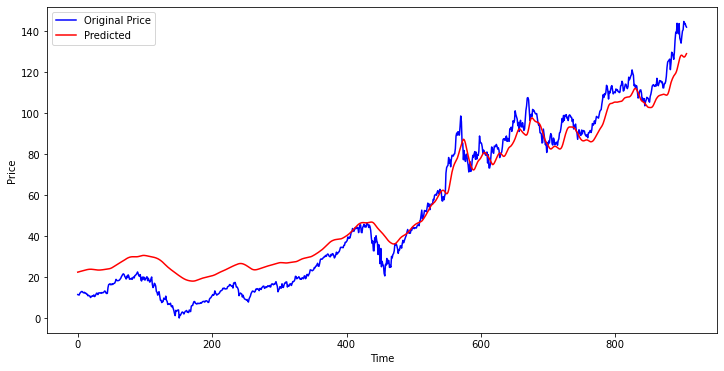

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()